In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)   

In [216]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1031]:
#Separating the 3 tables into dataframes
spend = pd.read_csv('../data/spend.csv', delimiter='\t', index_col=0)
spend = spend.transpose()

opp = pd.read_csv('../data/opportunities.csv', delimiter='\t', index_col=0)
opp = opp.transpose()

sales = pd.read_csv('../data/sales.csv', delimiter='\t', index_col=0)
sales = sales.transpose()

# 

# 

# 

# Monthly Analysis

# 

### Creating Google DataFrame, formatting values, and casting as integers

In [804]:
google = pd.DataFrame(spend['Google Display'])
google.rename(columns={'Google Display': 'spend'}, inplace=True)
google['opportunity'] = opp['Google Display']
google['sales'] = sales['Google Display']
google.spend = [x[1:] for x in google.spend]
google.spend = google.spend.str.replace(',', '')
google.spend = [int(x) for x in google.spend]
google

,spend,opportunity,sales
Jan-20,263800,4868,1217
Feb-20,492366,4056,1014
Mar-20,424786,2894,752
Apr-20,277572,2543,737
May-20,309968,4041,1212
Jun-20,391885,4730,1277
Jul-20,497580,3095,867
Aug-20,327891,3538,885
Sep-20,309896,2630,658
Oct-20,636247,7023,2107


### Marketing/Ads Channel Spend Statistics for Google

In [548]:
pd.DataFrame(google.spend.describe())

,spend
count,12.000000
mean,478921.583333
std,228463.279527
min,263800.000000
25%,309950.000000
50%,408335.500000
75%,532246.750000
max,953374.000000


### Marketing/Ads Channel Opportunity Statistics for Google

In [546]:
pd.DataFrame(google.opportunity.describe())

,opportunity
count,12.000000
mean,4227.333333
std,1423.104183
min,2543.000000
25%,3044.750000
50%,4048.500000
75%,4913.250000
max,7023.000000


### Marketing/Ads Channel Sales Statistics for Google

In [547]:
pd.DataFrame(google.sales.describe())

,sales
count,12.000000
mean,1160.916667
std,437.300907
min,658.000000
25%,838.250000
50%,1113.000000
75%,1336.500000
max,2107.000000


In [ ]:
plt.bar()

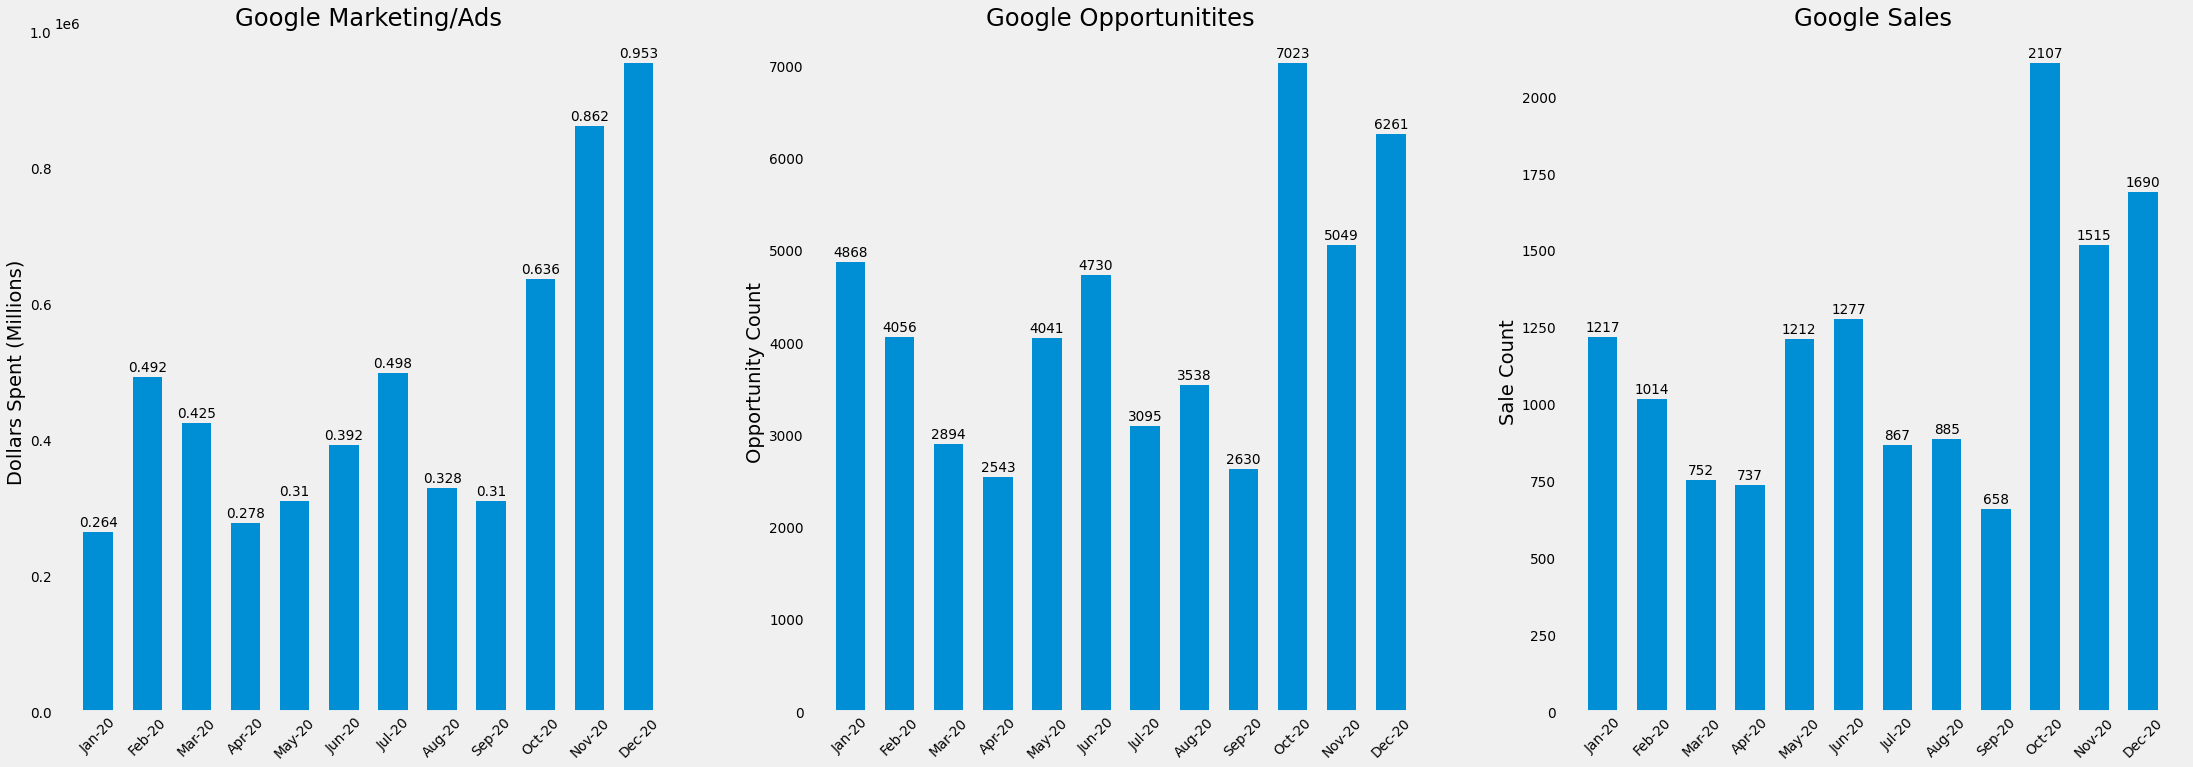

In [1010]:
plt.style.use('fivethirtyeight')



fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(google.index, google['spend'], 0.6)
ax[0].set_ylabel('Dollars Spent (Millions)', fontsize=20)
ax[0].set_title('Google Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(google.index, rotation=45)
ax[0].grid(False)


rect2 = ax[1].bar(google.index, google['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('Google Opportunitites', fontsize=25)
ax[1].set_xticklabels(google.index, rotation=45)
ax[1].grid(False)


rect3 = ax[2].bar(google.index, google['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('Google Sales', fontsize=25)
ax[2].set_xticklabels(google.index, rotation=45)
ax[2].grid(False)




def autolabel(rects, axes, million=False):
    for rect in rects:
        if million:
            height = rect.get_height()
            ax[axes].annotate('{}'.format((height / 1000000).round(3)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            height = rect.get_height()
            ax[axes].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')
            

autolabel(rect1, 0, million=True)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating per_sale_spend dictionary containing months as keys and the Customer Acquisition Cost for Google as values

In [667]:
per_sale_spend = {}
for m, x in enumerate(zip(list(google.spend), list(google.sales))):
    per_sale_spend.update({m+1: np.round((x[0]/x[1]), 2)})

In [668]:
per_sale_spend

{1: 216.76,
 2: 485.57,
 3: 564.88,
 4: 376.62,
 5: 255.75,
 6: 306.88,
 7: 573.91,
 8: 370.5,
 9: 470.97,
 10: 301.97,
 11: 568.77,
 12: 564.13}

### Creating opp_sale_conversion dictionary containing months as keys and the percentage of opportunites resulting in sales for Google as values

In [442]:
opp_sale_conversion = {}
for m, x in enumerate(zip(list(google.opportunity), list(google.sales))):
    opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

In [469]:
opp_sale_conversion

{1: 0.25,
 2: 0.25,
 3: 0.26,
 4: 0.29,
 5: 0.3,
 6: 0.27,
 7: 0.28,
 8: 0.25,
 9: 0.25,
 10: 0.3,
 11: 0.3,
 12: 0.27}

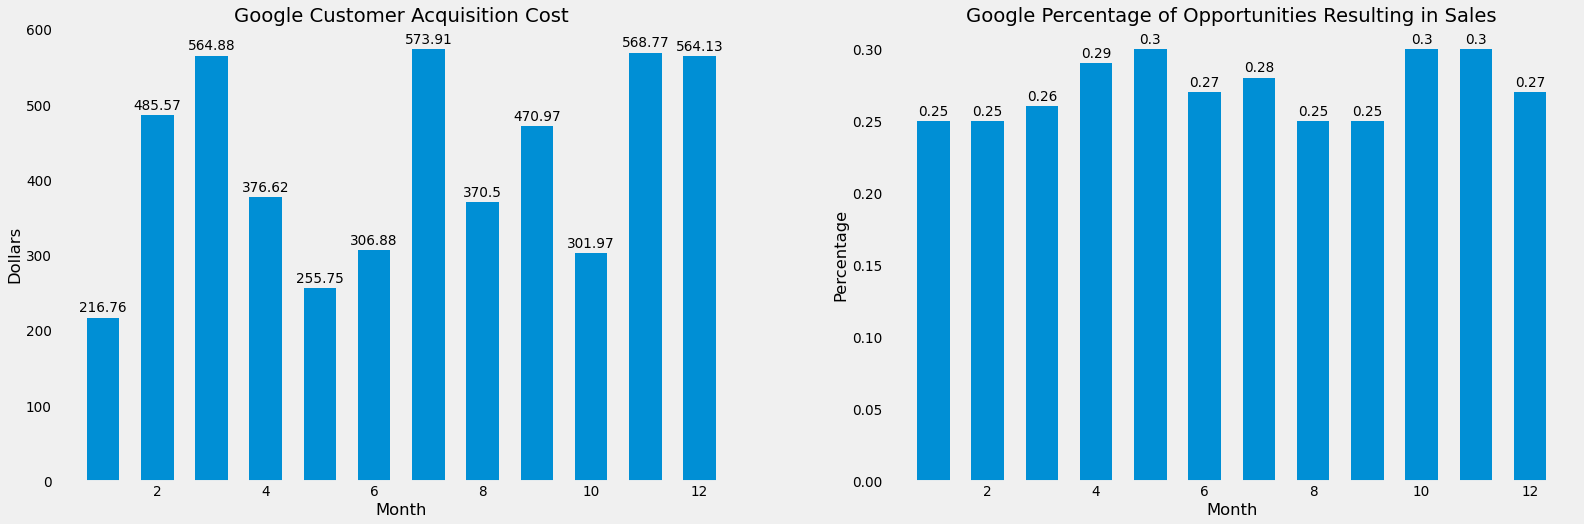

In [1078]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(per_sale_spend.keys(), per_sale_spend.values(), width=0.6)

ax[0].set_title('Google Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(opp_sale_conversion.keys(), opp_sale_conversion.values(), width=0.6)
ax[1].set_title('Google Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

#  

# 

# 

# 

In [809]:
facebook = pd.DataFrame(spend['Facebook'])
facebook.rename(columns={'Facebook': 'spend'}, inplace=True)
facebook['opportunity'] = opp['Facebook']
facebook['sales'] = sales['Facebook']
facebook.spend = [x[1:] for x in facebook.spend]
facebook.spend = facebook.spend.str.replace(',', '')
facebook.spend = [int(x) for x in facebook.spend]
facebook

,spend,opportunity,sales
Jan-20,294315,2815,760
Feb-20,312374,4709,1319
Mar-20,391183,4400,1144
Apr-20,434960,4424,1194
May-20,438772,2658,797
Jun-20,288387,2707,731
Jul-20,413709,4181,1254
Aug-20,332810,2558,691
Sep-20,282658,2960,888
Oct-20,729171,6563,1903


In [550]:
pd.DataFrame(facebook.spend.describe())

,spend
count,12.000000
mean,463800.333333
std,211585.646828
min,282658.000000
25%,307859.250000
50%,402446.000000
75%,509104.750000
max,927162.000000


In [552]:
pd.DataFrame(facebook.opportunity.describe())

,opportunity
count,12.000000
mean,4296.250000
std,1676.705163
min,2558.000000
25%,2788.000000
50%,4290.500000
75%,5059.000000
max,7471.000000


In [553]:
pd.DataFrame(facebook.sales.describe())

,sales
count,12.000000
mean,1209.166667
std,493.601759
min,691.000000
25%,787.750000
50%,1169.000000
75%,1386.250000
max,2241.000000


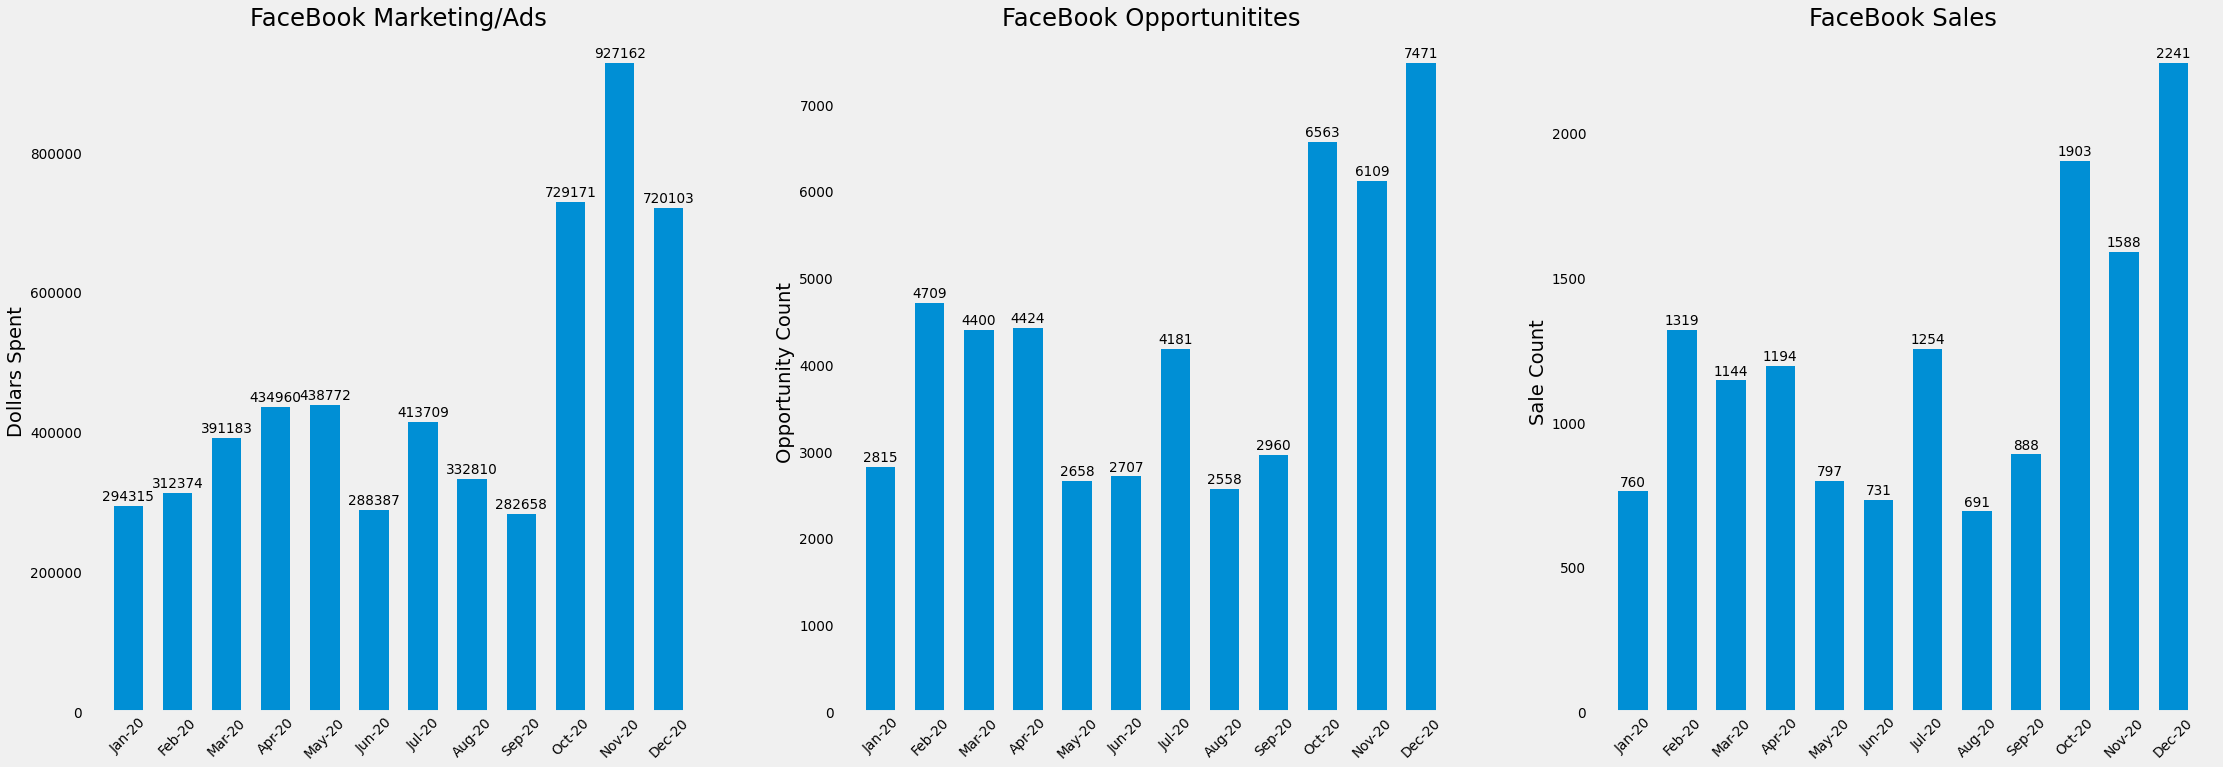

In [685]:
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(facebook.index, facebook.spend, 0.6)
ax[0].set_ylabel('Dollars Spent', fontsize=20)
ax[0].set_title('FaceBook Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(facebook.index, rotation=45)

rect2 = ax[1].bar(facebook.index, facebook['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('FaceBook Opportunitites', fontsize=25)
ax[1].set_xticklabels(facebook.index, rotation=45)


rect3 = ax[2].bar(facebook.index, facebook['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('FaceBook Sales', fontsize=25)
ax[2].set_xticklabels(facebook.index, rotation=45)

ax[0].grid(False)

ax[1].grid(False)

ax[2].grid(False)



autolabel(rect1, 0)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating fb_per_sale_spend dictionary containing months as keys and the Customer Acquisition Cost for FaceBook as values

In [669]:
fb_per_sale_spend = {}
for m, x in enumerate(zip(list(facebook.spend), list(facebook.sales))):
    fb_per_sale_spend.update({m+1: np.round((x[0]/x[1]), 2)})

In [670]:
fb_per_sale_spend

{1: 387.26,
 2: 236.83,
 3: 341.94,
 4: 364.29,
 5: 550.53,
 6: 394.51,
 7: 329.91,
 8: 481.64,
 9: 318.31,
 10: 383.17,
 11: 583.86,
 12: 321.33}

### Creating fb_opp_sale_conversion dictionary containing months as keys and the percentage of opportunities resulting in sales for FaceBook as values

In [671]:
fb_opp_sale_conversion = {}
for m, x in enumerate(zip(list(facebook.opportunity), list(facebook.sales))):
    fb_opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

In [672]:
fb_opp_sale_conversion

{1: 0.27,
 2: 0.28,
 3: 0.26,
 4: 0.27,
 5: 0.3,
 6: 0.27,
 7: 0.3,
 8: 0.27,
 9: 0.3,
 10: 0.29,
 11: 0.26,
 12: 0.3}

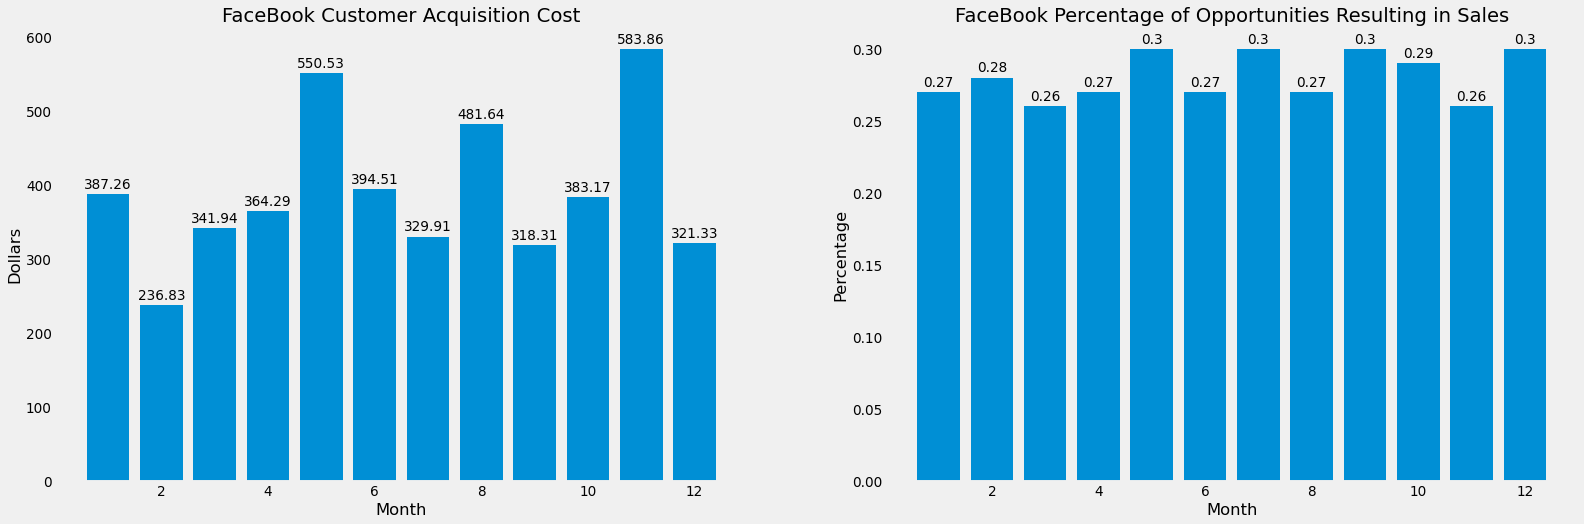

In [1079]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(fb_per_sale_spend.keys(), fb_per_sale_spend.values())

ax[0].set_title('FaceBook Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(fb_opp_sale_conversion.keys(), fb_opp_sale_conversion.values())
ax[1].set_title('FaceBook Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

#  

# 

# 

# 

In [810]:
tv = pd.DataFrame(spend['TV'])
tv.rename(columns={'TV': 'spend'}, inplace=True)
tv['opportunity'] = opp['TV']
tv['sales'] = sales['TV']
tv.spend = [x[1:] for x in tv.spend]
tv.spend = tv.spend.str.replace(',', '')
tv.spend = [int(x) for x in tv.spend]
tv

,spend,opportunity,sales
Jan-20,898785,9347,3739
Feb-20,851612,5412,1948
Mar-20,999230,5881,1941
Apr-20,835727,7843,2667
May-20,785051,6027,1868
Jun-20,796760,9745,3898
Jul-20,528539,5176,1915
Aug-20,941742,6646,2459
Sep-20,727769,9615,3365
Oct-20,1490451,12845,5138


In [554]:
pd.DataFrame(tv.spend.describe())

,spend
count,1.200000e+01
mean,1.053214e+06
std,4.515111e+05
min,5.285390e+05
25%,7.938328e+05
50%,8.751985e+05
75%,1.122035e+06
max,1.893095e+06


In [555]:
pd.DataFrame(tv.opportunity.describe())

,opportunity
count,12.000000
mean,9221.250000
std,4137.210679
min,5176.000000
25%,5990.500000
50%,8595.000000
75%,10520.000000
max,19255.000000


In [556]:
pd.DataFrame(tv.sales.describe())

,sales
count,12.000000
mean,3380.333333
std,1614.556980
min,1868.000000
25%,1946.250000
50%,3016.000000
75%,4049.000000
max,7124.000000


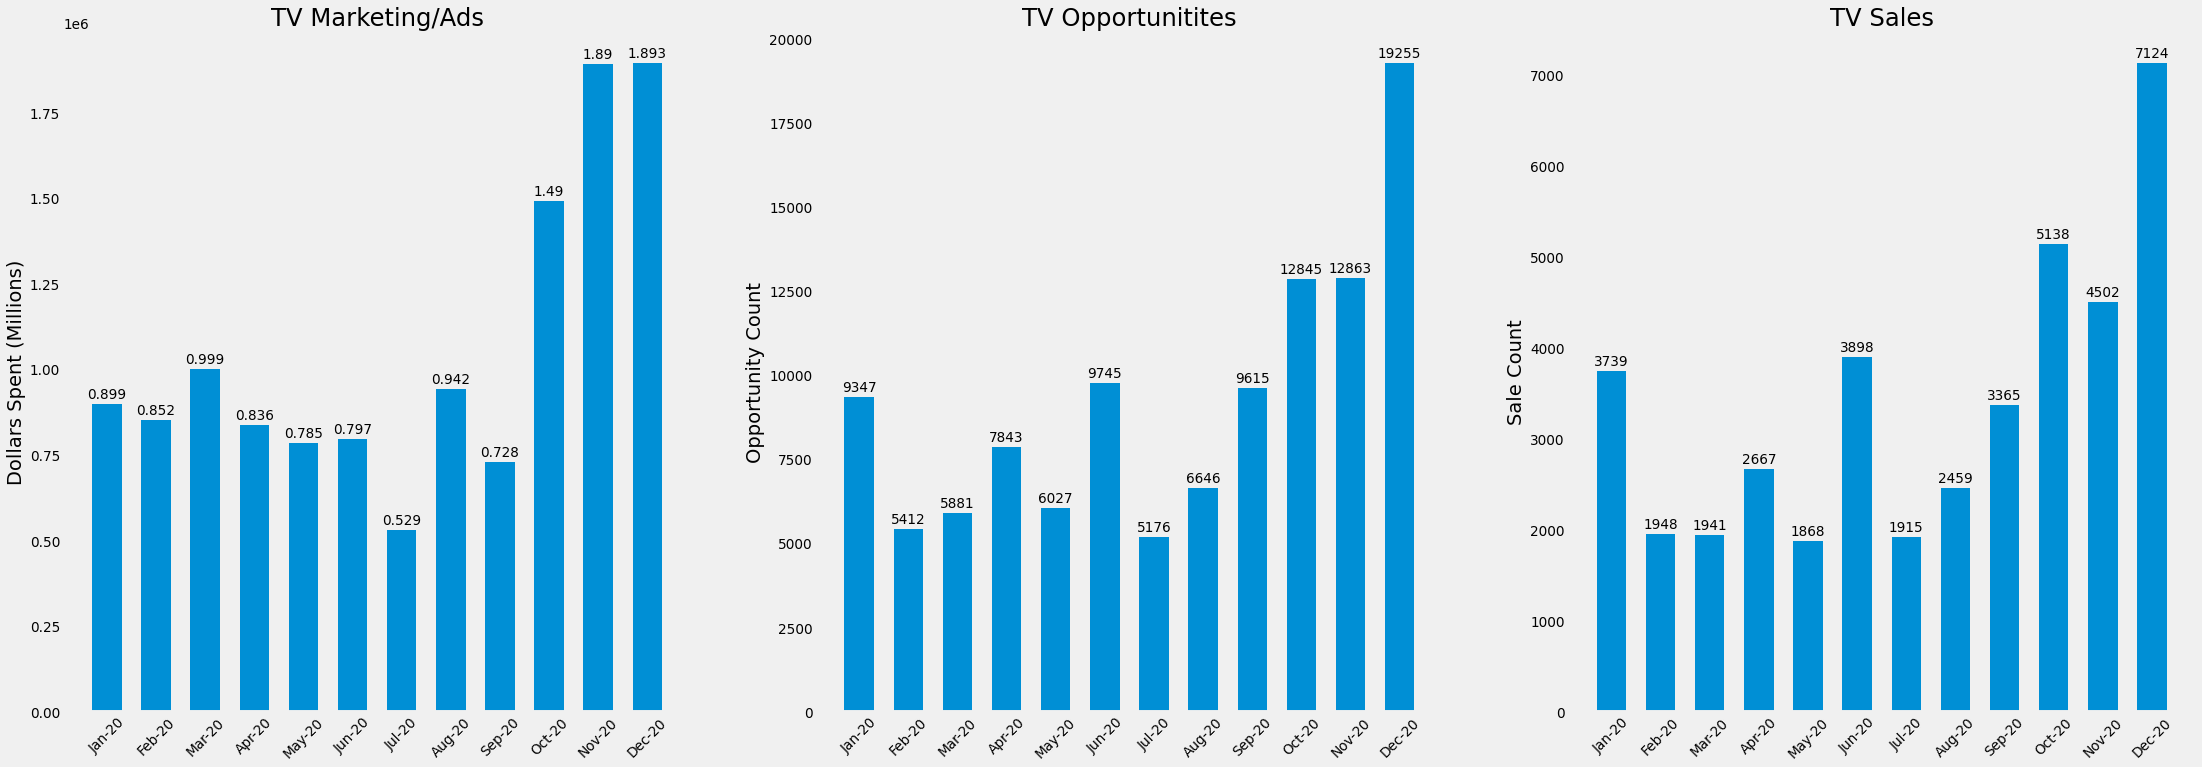

In [692]:
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(tv.index, tv.spend, 0.6)
ax[0].set_ylabel('Dollars Spent (Millions)', fontsize=20)
ax[0].set_title('TV Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(tv.index, rotation=45)

rect2 = ax[1].bar(tv.index, tv['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('TV Opportunitites', fontsize=25)
ax[1].set_xticklabels(tv.index, rotation=45)


rect3 = ax[2].bar(tv.index, tv['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('TV Sales', fontsize=25)
ax[2].set_xticklabels(tv.index, rotation=45)

ax[0].grid(False)

ax[1].grid(False)

ax[2].grid(False)



autolabel(rect1, 0, million=True)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating tv_per_sale_spend dictionary containing months as keys and the Customer Acquisition Cost for TV as values

In [791]:
tv_per_sale_spend = {}
for m, x in enumerate(zip(list(tv.spend), list(tv.sales))):
    tv_per_sale_spend.update({m+1: np.round((x[0]/x[1]), 2)})

In [792]:
tv_per_sale_spend

{1: 240.38,
 2: 437.17,
 3: 514.8,
 4: 313.36,
 5: 420.26,
 6: 204.4,
 7: 276.0,
 8: 382.98,
 9: 216.28,
 10: 290.08,
 11: 419.77,
 12: 265.73}

### Creating tv_opp_sale_conversion dictionary containing months as keys and the percentage of opportunites resulting in sales for TV as values

In [528]:
tv_opp_sale_conversion = {}
for m, x in enumerate(zip(list(tv.opportunity), list(tv.sales))):
    tv_opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

In [529]:
tv_opp_sale_conversion

{1: 0.4,
 2: 0.36,
 3: 0.33,
 4: 0.34,
 5: 0.31,
 6: 0.4,
 7: 0.37,
 8: 0.37,
 9: 0.35,
 10: 0.4,
 11: 0.35,
 12: 0.37}

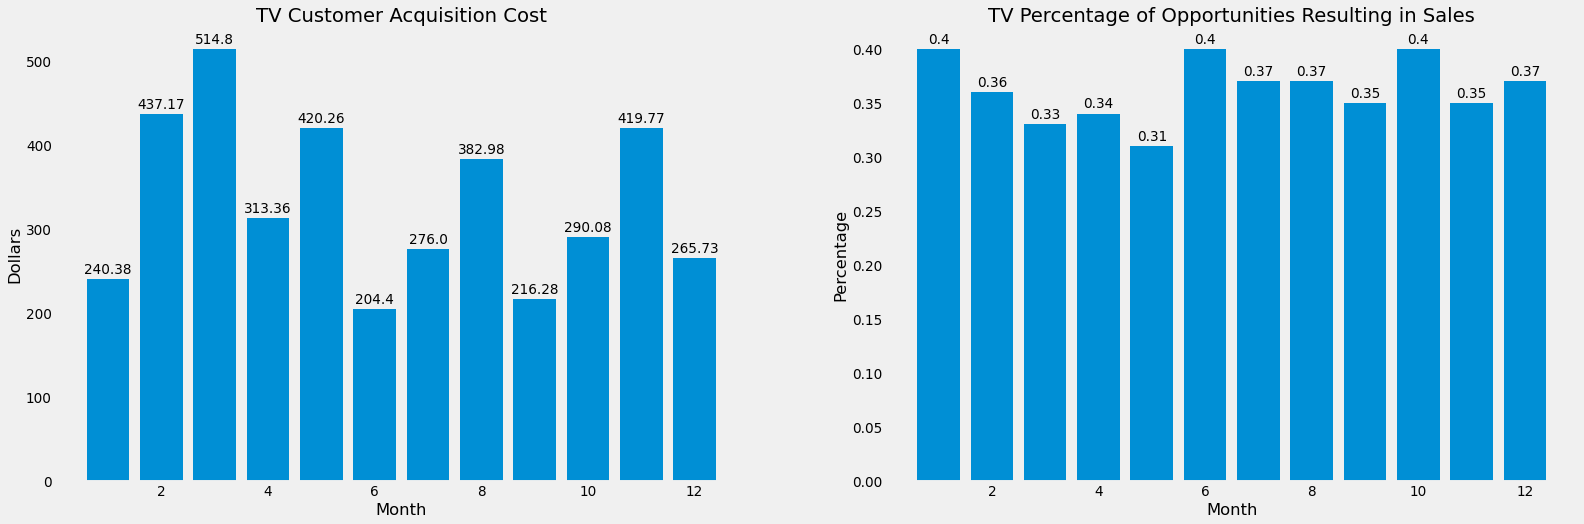

In [1080]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(tv_per_sale_spend.keys(), tv_per_sale_spend.values())

ax[0].set_title('TV Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(tv_opp_sale_conversion.keys(), tv_opp_sale_conversion.values())
ax[1].set_title('TV Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

# 

# 

# 

# 

In [811]:
mail = pd.DataFrame(spend['Mail'])
mail.rename(columns={'Mail': 'spend'}, inplace=True)
mail['opportunity'] = opp['Mail']
mail['sales'] = sales['Mail']
mail.spend = [x[1:] for x in mail.spend]
mail.spend = mail.spend.str.replace(',', '')
mail.spend = [int(x) for x in mail.spend]
mail

,spend,opportunity,sales
Jan-20,134680,1419,326
Feb-20,72234,1482,311
Mar-20,131934,648,149
Apr-20,137912,1212,206
May-20,142028,1381,345
Jun-20,69507,1220,293
Jul-20,87944,748,180
Aug-20,102032,1354,203
Sep-20,54602,1044,209
Oct-20,236124,2518,478


In [558]:
pd.DataFrame(mail.spend.describe())

,spend
count,12.000000
mean,138418.083333
std,70193.221446
min,54602.000000
25%,84016.500000
50%,133307.000000
75%,161398.750000
max,272509.000000


In [559]:
pd.DataFrame(mail.opportunity.describe())

,opportunity
count,12.000000
mean,1395.833333
std,532.375096
min,648.000000
25%,1170.000000
50%,1367.500000
75%,1489.250000
max,2518.000000


In [560]:
pd.DataFrame(mail.sales.describe())

,sales
count,12.000000
mean,285.833333
std,98.397000
min,149.000000
25%,205.250000
50%,302.000000
75%,335.250000
max,478.000000


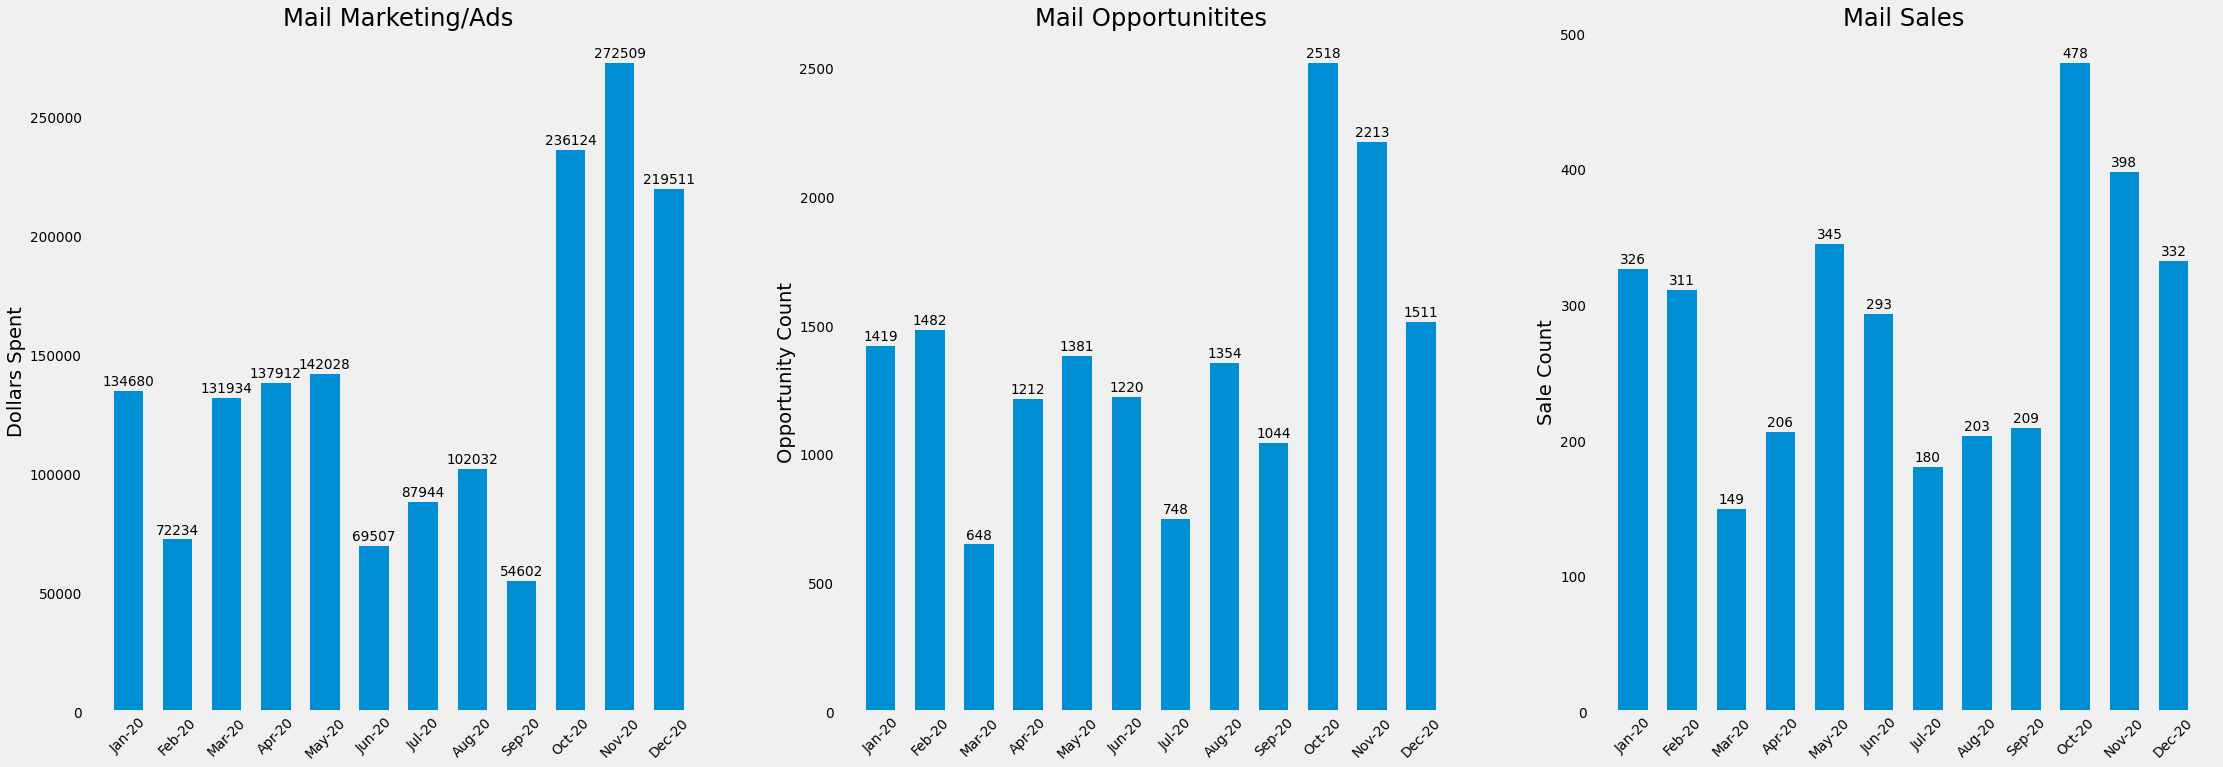

In [949]:
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(mail.index, mail.spend, 0.6)
ax[0].set_ylabel('Dollars Spent', fontsize=20)
ax[0].set_title('Mail Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(mail.index, rotation=45)

rect2 = ax[1].bar(mail.index, mail['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('Mail Opportunitites', fontsize=25)
ax[1].set_xticklabels(mail.index, rotation=45)


rect3 = ax[2].bar(mail.index, mail['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('Mail Sales', fontsize=25)
ax[2].set_xticklabels(mail.index, rotation=45)

ax[0].grid(False)

ax[1].grid(False)

ax[2].grid(False)


autolabel(rect1, 0)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating mail_per_sale_spend dictionary containing months as keys and the Customer Acquisition Cost for Mail as values

In [677]:
mail_per_sale_spend = {}
for m, x in enumerate(zip(list(mail.spend), list(mail.sales))):
    mail_per_sale_spend.update({m+1: np.round((x[0]/x[1]), 2)})

In [678]:
mail_per_sale_spend

{1: 413.13,
 2: 232.26,
 3: 885.46,
 4: 669.48,
 5: 411.68,
 6: 237.23,
 7: 488.58,
 8: 502.62,
 9: 261.25,
 10: 493.98,
 11: 684.7,
 12: 661.18}

### Creating mail_opp_sale_conversion dictionary containing months as keys and the percentage of opportunities resulting in sales for mail as values

In [675]:
mail_opp_sale_conversion = {}
for m, x in enumerate(zip(list(mail.opportunity), list(mail.sales))):
    mail_opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

In [676]:
mail_opp_sale_conversion

{1: 0.23,
 2: 0.21,
 3: 0.23,
 4: 0.17,
 5: 0.25,
 6: 0.24,
 7: 0.24,
 8: 0.15,
 9: 0.2,
 10: 0.19,
 11: 0.18,
 12: 0.22}

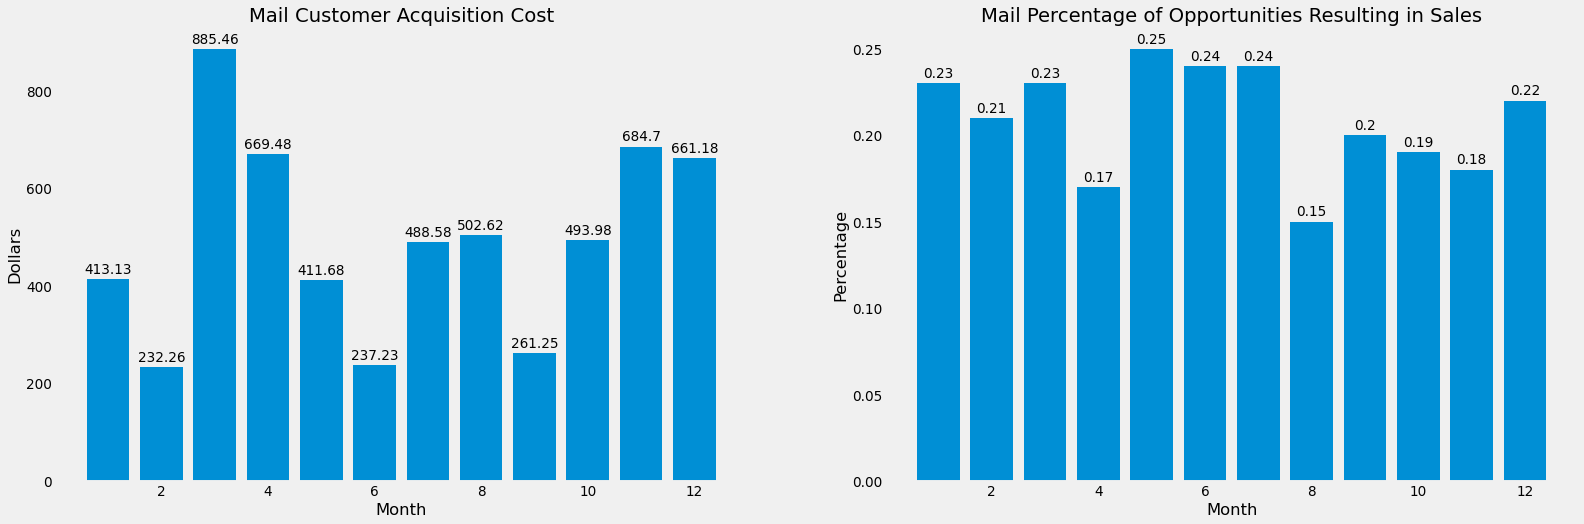

In [1081]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(mail_per_sale_spend.keys(), mail_per_sale_spend.values())

ax[0].set_title('Mail Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(mail_opp_sale_conversion.keys(), mail_opp_sale_conversion.values())
ax[1].set_title('Mail Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

# 

# 

# 

# 

In [812]:
other = pd.DataFrame(spend['Other'])
other.rename(columns={'Other': 'spend'}, inplace=True)
other['opportunity'] = opp['Other']
other['sales'] = sales['Other']
other.spend = [x[1:] for x in other.spend]
other.spend = other.spend.str.replace(',', '')
other.spend = [int(x) for x in other.spend]
other

,spend,opportunity,sales
Jan-20,9681,61,4
Feb-20,7285,59,4
Mar-20,9434,99,6
Apr-20,6596,95,9
May-20,8638,73,7
Jun-20,8374,93,7
Jul-20,5079,74,4
Aug-20,8589,94,8
Sep-20,9671,64,6
Oct-20,9437,50,4


In [562]:
pd.DataFrame(other.spend.describe())

,spend
count,12.00000
mean,8064.50000
std,1518.34105
min,5079.00000
25%,7112.75000
50%,8481.50000
75%,9434.75000
max,9681.00000


In [563]:
pd.DataFrame(other.opportunity.describe())

,opportunity
count,12.000000
mean,74.833333
std,16.414148
min,50.000000
25%,63.250000
50%,71.000000
75%,93.250000
max,99.000000


In [564]:
pd.DataFrame(other.sales.describe())

,sales
count,12.000000
mean,5.916667
std,1.729862
min,4.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,9.000000


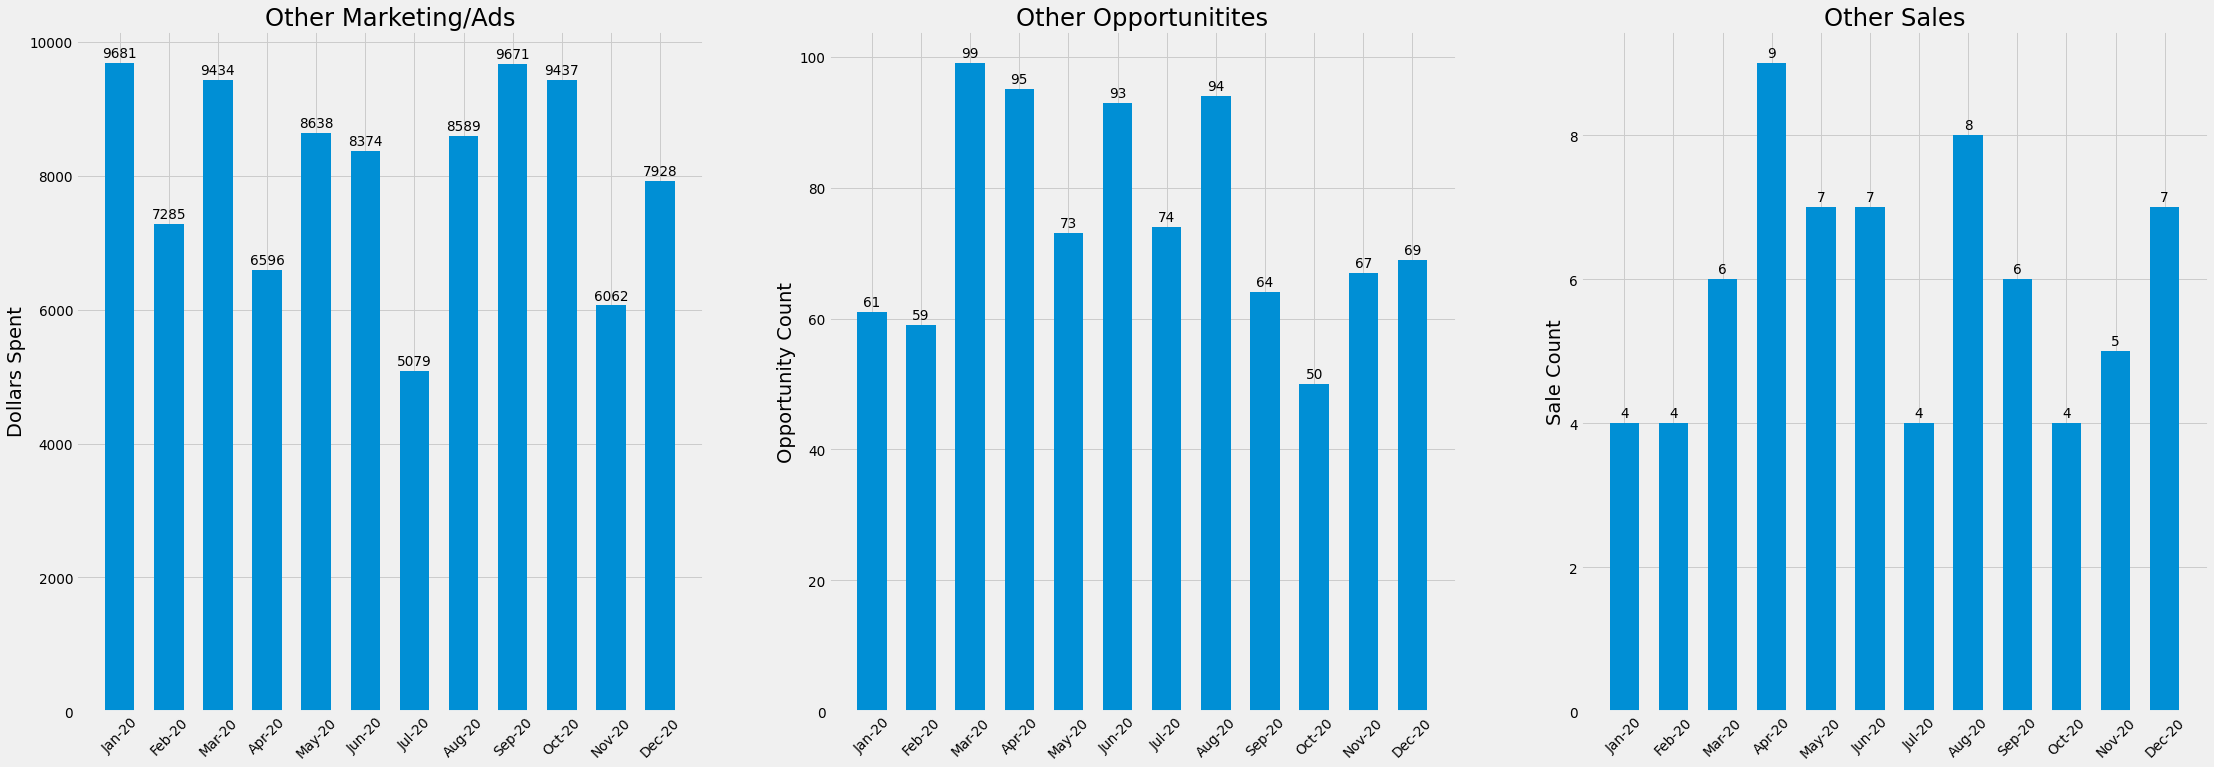

In [565]:
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(35,12), dpi=70)
rect1 = ax[0].bar(other.index, other.spend, 0.6)
ax[0].set_ylabel('Dollars Spent', fontsize=20)
ax[0].set_title('Other Marketing/Ads', fontsize=25)
ax[0].set_xticklabels(other.index, rotation=45)

rect2 = ax[1].bar(other.index, other['opportunity'], 0.6)
ax[1].set_ylabel('Opportunity Count', fontsize=20)
ax[1].set_title('Other Opportunitites', fontsize=25)
ax[1].set_xticklabels(other.index, rotation=45)


rect3 = ax[2].bar(other.index, other['sales'], 0.6)
ax[2].set_ylabel('Sale Count', fontsize=20)
ax[2].set_title('Other Sales', fontsize=25)
ax[2].set_xticklabels(other.index, rotation=45)


autolabel(rect1, 0)
autolabel(rect2, 1)
autolabel(rect3, 2);

### Creating other_per_sale_spend dictionary containing months as keys and the Customer Acquisition Cost for Other as values

In [680]:
other_per_sale_spend = {}
for m, x in enumerate(zip(list(other.spend), list(other.sales))):
    other_per_sale_spend.update({m+1: np.round((x[0]/x[1]), 2)})

In [681]:
other_per_sale_spend

{1: 2420.25,
 2: 1821.25,
 3: 1572.33,
 4: 732.89,
 5: 1234.0,
 6: 1196.29,
 7: 1269.75,
 8: 1073.62,
 9: 1611.83,
 10: 2359.25,
 11: 1212.4,
 12: 1132.57}

### Creating other_opp_sale_conversion dictionary containing months as keys and the percentage of opportunities resulting in sales for Other as values

In [577]:
other_opp_sale_conversion = {}
for m, x in enumerate(zip(list(other.opportunity), list(other.sales))):
    other_opp_sale_conversion.update({m+1: np.round((x[1] / x[0]), 2)})

In [578]:
other_opp_sale_conversion

{1: 0.07,
 2: 0.07,
 3: 0.06,
 4: 0.09,
 5: 0.1,
 6: 0.08,
 7: 0.05,
 8: 0.09,
 9: 0.09,
 10: 0.08,
 11: 0.07,
 12: 0.1}

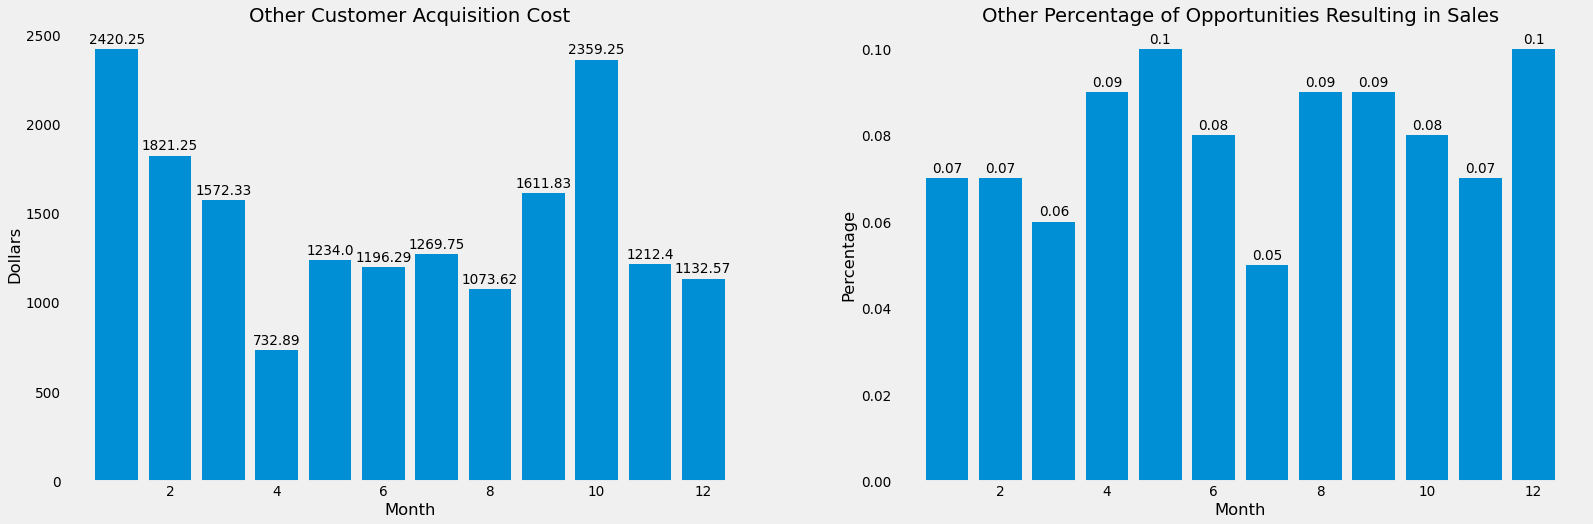

In [1082]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25,8), dpi=70, sharex=True)
rect = ax[0].bar(other_per_sale_spend.keys(), other_per_sale_spend.values())

ax[0].set_title('Other Customer Acquisition Cost')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Dollars')
ax[0].grid(False)


rect2 = ax[1].bar(other_opp_sale_conversion.keys(), other_opp_sale_conversion.values())
ax[1].set_title('Other Percentage of Opportunities Resulting in Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage')
ax[1].grid(False)


autolabel(rect, 0)
autolabel(rect2, 1)

# 

# 

# 

# 

In [641]:
spend = pd.read_csv('../data/spend.csv', delimiter='\t', index_col=0)


for x in spend:
    spend[x] = ([i[1:] for i in spend[x]])
    spend[x] = spend[x].str.replace(',', '')
    
spend = spend.apply(pd.to_numeric)

spend

In [663]:
spend['channel_total'] = spend.sum(axis=1)
spend

,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,channel_total
Spend,,,,,,,,,,,,,
Google Display,263800,492366,424786,277572,309968,391885,497580,327891,309896,636247,861694,953374,5747059
Facebook,294315,312374,391183,434960,438772,288387,413709,332810,282658,729171,927162,720103,5565604
TV,898785,851612,999230,835727,785051,796760,528539,941742,727769,1490451,1889813,1893095,12638574
Mail,134680,72234,131934,137912,142028,69507,87944,102032,54602,236124,272509,219511,1661017
Other,9681,7285,9434,6596,8638,8374,5079,8589,9671,9437,6062,7928,96774


### Creating channel_total_spend dictionary containing marketing channels as keys and the annual total spend on marketing/ads as values

In [665]:
channel_total_spend = {}
for k,v in list(zip(spend.index, spend.channel_total)):
    channel_total_spend.update({k: v})
channel_total_spend

{'Google Display': 5747059,
 'Facebook': 5565604,
 'TV': 12638574,
 'Mail': 1661017,
 'Other': 96774}

In [658]:
spend_long = pd.read_csv('../data/spend.csv', delimiter='\t', index_col=0)
for x in spend_long:
    spend_long[x] = ([i[1:] for i in spend_long[x]])
    spend_long[x] = spend_long[x].str.replace(',', '')
    
spend_long = spend_long.apply(pd.to_numeric)
spend_long = spend_long.T
spend_long['monthly_total (Millions)'] = spend_long.sum(axis=1)
spend_long['monthly_total (Millions)'] = [(x/1000000) for x in spend_long['monthly_total (Millions)']]
spend_long.round(2)

Spend,Google Display,Facebook,TV,Mail,Other,monthly_total (Millions)
Jan-20,263800,294315,898785,134680,9681,1.60
Feb-20,492366,312374,851612,72234,7285,1.74
Mar-20,424786,391183,999230,131934,9434,1.96
Apr-20,277572,434960,835727,137912,6596,1.69
May-20,309968,438772,785051,142028,8638,1.68
Jun-20,391885,288387,796760,69507,8374,1.55
Jul-20,497580,413709,528539,87944,5079,1.53
Aug-20,327891,332810,941742,102032,8589,1.71
Sep-20,309896,282658,727769,54602,9671,1.38
Oct-20,636247,729171,1490451,236124,9437,3.10


In [659]:
spend_long['monthly_total (Millions)'].sum()

25.709028

In [666]:
monthly_spend_totals = {}
for k,v in list(zip(spend_long.index, spend_long['monthly_total (Millions)'])):
    monthly_spend_totals.update({k: v})
monthly_spend_totals

{'Jan-20': 1.601261,
 'Feb-20': 1.735871,
 'Mar-20': 1.956567,
 'Apr-20': 1.692767,
 'May-20': 1.684457,
 'Jun-20': 1.554913,
 'Jul-20': 1.532851,
 'Aug-20': 1.713064,
 'Sep-20': 1.384596,
 'Oct-20': 3.10143,
 'Nov-20': 3.95724,
 'Dec-20': 3.794011}

# 

# 

In [697]:
opp_long = pd.read_csv('../data/opportunities.csv', delimiter='\t', index_col=0)

opp_long = opp_long.T
opp_long['monthly_total'] = opp_long.sum(axis=1)
opp_long

Opportunities,Google Display,Facebook,TV,Mail,Other,monthly_total
Jan-20,4868,2815,9347,1419,61,18510
Feb-20,4056,4709,5412,1482,59,15718
Mar-20,2894,4400,5881,648,99,13922
Apr-20,2543,4424,7843,1212,95,16117
May-20,4041,2658,6027,1381,73,14180
Jun-20,4730,2707,9745,1220,93,18495
Jul-20,3095,4181,5176,748,74,13274
Aug-20,3538,2558,6646,1354,94,14190
Sep-20,2630,2960,9615,1044,64,16313
Oct-20,7023,6563,12845,2518,50,28999


In [698]:
monthly_opp_totals = {}
for k,v in list(zip(opp_long.index, opp_long.monthly_total)):
    monthly_opp_totals.update({k: v})
    
monthly_opp_totals

{'Jan-20': 18510,
 'Feb-20': 15718,
 'Mar-20': 13922,
 'Apr-20': 16117,
 'May-20': 14180,
 'Jun-20': 18495,
 'Jul-20': 13274,
 'Aug-20': 14190,
 'Sep-20': 16313,
 'Oct-20': 28999,
 'Nov-20': 26301,
 'Dec-20': 34567}

# 

# 

In [719]:
sale_long = pd.read_csv('../data/sales.csv', delimiter='\t', index_col=0)

sale_long = sale_long.T
sale_long['monthly_total'] = sale_long.sum(axis=1)
sale_long

Sales,Google Display,Facebook,TV,Mail,Other,monthly_total
Jan-20,1217,760,3739,326,4,6046
Feb-20,1014,1319,1948,311,4,4596
Mar-20,752,1144,1941,149,6,3992
Apr-20,737,1194,2667,206,9,4813
May-20,1212,797,1868,345,7,4229
Jun-20,1277,731,3898,293,7,6206
Jul-20,867,1254,1915,180,4,4220
Aug-20,885,691,2459,203,8,4246
Sep-20,658,888,3365,209,6,5126
Oct-20,2107,1903,5138,478,4,9630


# 

# 

In [767]:
df = pd.DataFrame()
df['Google_spend'] = google.spend
#percentage of monthly budget spent on Google Display
df['Google_spend_%'] = [np.round((x/i), 3) for x,i in list(zip(google.spend, (spend_long['monthly_total (Millions)']*1000000)))]    
df['Google_Opp'] = google.opportunity
df['Google_Sales'] = google.sales


df['FB_Spend'] = facebook.spend
df['FB_Opp'] = facebook.opportunity
df['FB_Sales'] = facebook.sales


df['TV_Spend'] = tv.spend
df['TV_Opp'] = tv.opportunity
df['TV_Sales'] = tv.sales

df['Mail_Spend'] = mail.spend
df['Mail_Opp'] = mail.opportunity
df['Mail_Sales'] = mail.sales


df['Other_Spend'] = other.spend
df['Other_Opp'] = other.opportunity
df['Other_Sales'] = other.sales

df['Total_Spend (Millions)'] = monthly_spend_totals.values()
df['Total_Opportunities'] = monthly_opp_totals.values()
df['Total_Sales'] = sale_long.monthly_total

In [768]:
df

,Google_spend,Google_spend_%,Google_Opp,Google_Sales,FB_Spend,FB_Opp,FB_Sales,TV_Spend,TV_Opp,TV_Sales,Mail_Spend,Mail_Opp,Mail_Sales,Other_Spend,Other_Opp,Other_Sales,Total_Spend (Millions),Total_Opportunities,Total_Sales
Jan-20,263800,0.165,4868,1217,294315,2815,760,898785,9347,3739,134680,1419,326,9681,61,4,1.601261,18510,6046
Feb-20,492366,0.284,4056,1014,312374,4709,1319,851612,5412,1948,72234,1482,311,7285,59,4,1.735871,15718,4596
Mar-20,424786,0.217,2894,752,391183,4400,1144,999230,5881,1941,131934,648,149,9434,99,6,1.956567,13922,3992
Apr-20,277572,0.164,2543,737,434960,4424,1194,835727,7843,2667,137912,1212,206,6596,95,9,1.692767,16117,4813
May-20,309968,0.184,4041,1212,438772,2658,797,785051,6027,1868,142028,1381,345,8638,73,7,1.684457,14180,4229
Jun-20,391885,0.252,4730,1277,288387,2707,731,796760,9745,3898,69507,1220,293,8374,93,7,1.554913,18495,6206
Jul-20,497580,0.325,3095,867,413709,4181,1254,528539,5176,1915,87944,748,180,5079,74,4,1.532851,13274,4220
Aug-20,327891,0.191,3538,885,332810,2558,691,941742,6646,2459,102032,1354,203,8589,94,8,1.713064,14190,4246
Sep-20,309896,0.224,2630,658,282658,2960,888,727769,9615,3365,54602,1044,209,9671,64,6,1.384596,16313,5126
Oct-20,636247,0.205,7023,2107,729171,6563,1903,1490451,12845,5138,236124,2518,478,9437,50,4,3.101430,28999,9630


In [813]:
google['no_sale'] = [(x-i) for x, i in list(zip(google.opportunity, google.sales))]
google['Spend_%'] = [np.round((x/i), 3) for x,i in list(zip(google.spend, (spend_long['monthly_total (Millions)']*1000000)))]    
google['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(google.opportunity, opp_long.monthly_total))]    
google['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(google.sales, sale_long.monthly_total))]    
google['Spend_Per_Sale'] = per_sale_spend.values()
google['%_Opp->Sale'] = opp_sale_conversion.values()

In [814]:
google

,spend,opportunity,sales,no_sale,Spend_%,Opp_%,Sale_%,Spend_Per_Sale,%_Opp->Sale
Jan-20,263800,4868,1217,3651,0.165,0.263,0.201,216.76,0.25
Feb-20,492366,4056,1014,3042,0.284,0.258,0.221,485.57,0.25
Mar-20,424786,2894,752,2142,0.217,0.208,0.188,564.88,0.26
Apr-20,277572,2543,737,1806,0.164,0.158,0.153,376.62,0.29
May-20,309968,4041,1212,2829,0.184,0.285,0.287,255.75,0.30
Jun-20,391885,4730,1277,3453,0.252,0.256,0.206,306.88,0.27
Jul-20,497580,3095,867,2228,0.325,0.233,0.205,573.91,0.28
Aug-20,327891,3538,885,2653,0.191,0.249,0.208,370.50,0.25
Sep-20,309896,2630,658,1972,0.224,0.161,0.128,470.97,0.25
Oct-20,636247,7023,2107,4916,0.205,0.242,0.219,301.97,0.30


In [815]:
facebook['no_sale'] = [(x-i) for x, i in list(zip(facebook.opportunity, facebook.sales))]
facebook['Spend_%'] = [np.round((x/i), 3) for x,i in list(zip(facebook.spend, (spend_long['monthly_total (Millions)']*1000000)))]    
facebook['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(facebook.opportunity, opp_long.monthly_total))]    
facebook['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(facebook.sales, sale_long.monthly_total))]    
facebook['Spend_Per_Sale'] = fb_per_sale_spend.values()
facebook['%_Opp->Sale'] = fb_opp_sale_conversion.values()

In [816]:
facebook

,spend,opportunity,sales,no_sale,Spend_%,Opp_%,Sale_%,Spend_Per_Sale,%_Opp->Sale
Jan-20,294315,2815,760,2055,0.184,0.152,0.126,387.26,0.27
Feb-20,312374,4709,1319,3390,0.180,0.300,0.287,236.83,0.28
Mar-20,391183,4400,1144,3256,0.200,0.316,0.287,341.94,0.26
Apr-20,434960,4424,1194,3230,0.257,0.274,0.248,364.29,0.27
May-20,438772,2658,797,1861,0.260,0.187,0.188,550.53,0.30
Jun-20,288387,2707,731,1976,0.185,0.146,0.118,394.51,0.27
Jul-20,413709,4181,1254,2927,0.270,0.315,0.297,329.91,0.30
Aug-20,332810,2558,691,1867,0.194,0.180,0.163,481.64,0.27
Sep-20,282658,2960,888,2072,0.204,0.181,0.173,318.31,0.30
Oct-20,729171,6563,1903,4660,0.235,0.226,0.198,383.17,0.29


In [817]:
tv['no_sale'] = [(x-i) for x, i in list(zip(tv.opportunity, tv.sales))]
tv['Spend_%'] = [np.round((x/i), 3) for x,i in list(zip(tv.spend, (spend_long['monthly_total (Millions)']*1000000)))]    
tv['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(tv.opportunity, opp_long.monthly_total))]    
tv['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(tv.sales, sale_long.monthly_total))]    
tv['Spend_Per_Sale'] = tv_per_sale_spend.values()
tv['%_Opp->Sale'] = tv_opp_sale_conversion.values()

In [818]:
tv

,spend,opportunity,sales,no_sale,Spend_%,Opp_%,Sale_%,Spend_Per_Sale,%_Opp->Sale
Jan-20,898785,9347,3739,5608,0.561,0.505,0.618,240.38,0.40
Feb-20,851612,5412,1948,3464,0.491,0.344,0.424,437.17,0.36
Mar-20,999230,5881,1941,3940,0.511,0.422,0.486,514.80,0.33
Apr-20,835727,7843,2667,5176,0.494,0.487,0.554,313.36,0.34
May-20,785051,6027,1868,4159,0.466,0.425,0.442,420.26,0.31
Jun-20,796760,9745,3898,5847,0.512,0.527,0.628,204.40,0.40
Jul-20,528539,5176,1915,3261,0.345,0.390,0.454,276.00,0.37
Aug-20,941742,6646,2459,4187,0.550,0.468,0.579,382.98,0.37
Sep-20,727769,9615,3365,6250,0.526,0.589,0.656,216.28,0.35
Oct-20,1490451,12845,5138,7707,0.481,0.443,0.534,290.08,0.40


In [819]:
mail['no_sale'] = [(x-i) for x, i in list(zip(mail.opportunity, mail.sales))]
mail['Spend_%'] = [np.round((x/i), 3) for x,i in list(zip(mail.spend, (spend_long['monthly_total (Millions)']*1000000)))]    
mail['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(mail.opportunity, opp_long.monthly_total))]    
mail['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(mail.sales, sale_long.monthly_total))]    
mail['Spend_Per_Sale'] = mail_per_sale_spend.values()
mail['%_Opp->Sale'] = mail_opp_sale_conversion.values()

In [820]:
mail

,spend,opportunity,sales,no_sale,Spend_%,Opp_%,Sale_%,Spend_Per_Sale,%_Opp->Sale
Jan-20,134680,1419,326,1093,0.084,0.077,0.054,413.13,0.23
Feb-20,72234,1482,311,1171,0.042,0.094,0.068,232.26,0.21
Mar-20,131934,648,149,499,0.067,0.047,0.037,885.46,0.23
Apr-20,137912,1212,206,1006,0.081,0.075,0.043,669.48,0.17
May-20,142028,1381,345,1036,0.084,0.097,0.082,411.68,0.25
Jun-20,69507,1220,293,927,0.045,0.066,0.047,237.23,0.24
Jul-20,87944,748,180,568,0.057,0.056,0.043,488.58,0.24
Aug-20,102032,1354,203,1151,0.060,0.095,0.048,502.62,0.15
Sep-20,54602,1044,209,835,0.039,0.064,0.041,261.25,0.20
Oct-20,236124,2518,478,2040,0.076,0.087,0.050,493.98,0.19


In [821]:
other['no_sale'] = [(x-i) for x, i in list(zip(other.opportunity, other.sales))]
other['Spend_%'] = [np.round((x/i), 3) for x,i in list(zip(other.spend, (spend_long['monthly_total (Millions)']*1000000)))]    
other['Opp_%'] = [np.round((x/i), 3) for x,i in list(zip(other.opportunity, opp_long.monthly_total))]    
other['Sale_%'] = [np.round((x/i), 3) for x,i in list(zip(other.sales, sale_long.monthly_total))]    
other['Spend_Per_Sale'] = other_per_sale_spend.values()
other['%_Opp->Sale'] = other_opp_sale_conversion.values()

In [822]:
other

,spend,opportunity,sales,no_sale,Spend_%,Opp_%,Sale_%,Spend_Per_Sale,%_Opp->Sale
Jan-20,9681,61,4,57,0.006,0.003,0.001,2420.25,0.07
Feb-20,7285,59,4,55,0.004,0.004,0.001,1821.25,0.07
Mar-20,9434,99,6,93,0.005,0.007,0.002,1572.33,0.06
Apr-20,6596,95,9,86,0.004,0.006,0.002,732.89,0.09
May-20,8638,73,7,66,0.005,0.005,0.002,1234.00,0.10
Jun-20,8374,93,7,86,0.005,0.005,0.001,1196.29,0.08
Jul-20,5079,74,4,70,0.003,0.006,0.001,1269.75,0.05
Aug-20,8589,94,8,86,0.005,0.007,0.002,1073.62,0.09
Sep-20,9671,64,6,58,0.007,0.004,0.001,1611.83,0.09
Oct-20,9437,50,4,46,0.003,0.002,0.000,2359.25,0.08


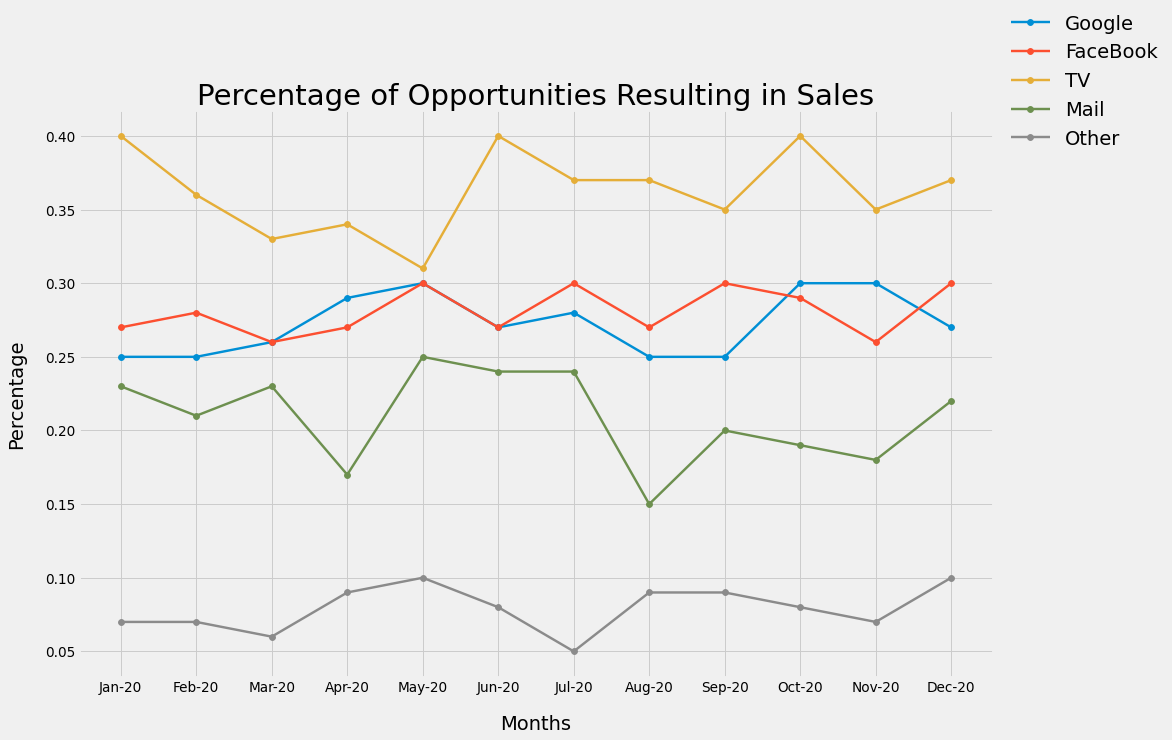

In [1009]:
fig, ax = plt.subplots(figsize=(15,10), dpi=70)
ax.set_title('Percentage of Opportunities Resulting in Sales', fontsize=30)
ax.set_xlabel('Months', fontsize=20, labelpad=20)
ax.set_ylabel('Percentage', fontsize=20, labelpad=20)
ax.set_xticks(ticks=list(range(0,12, 1)))


google['%_Opp->Sale'].plot(label='Google', marker='o', lw=2.5)
facebook['%_Opp->Sale'].plot(label='FaceBook', marker='o', lw=2.5)
tv['%_Opp->Sale'].plot(label='TV', marker='o', lw=2.5)
mail['%_Opp->Sale'].plot(label='Mail', marker='o', lw=2.5)
other['%_Opp->Sale'].plot(label='Other', marker='o', lw=2.5)


ax.legend(loc='best', prop={'size': 20}, framealpha=0, bbox_to_anchor=(.6,.6,.6,.6));

In [1014]:
channel_total_spend

{'Google Display': 5747059,
 'Facebook': 5565604,
 'TV': 12638574,
 'Mail': 1661017,
 'Other': 96774}

In [1027]:
channel_total_percentage = {}
for k,v in channel_total_spend.items():
    channel_total_percentage.update({k: (v/sum(list(channel_total_spend.values())))})
channel_total_percentage

{'Google Display': 0.22354244586765395,
 'Facebook': 0.2164844194031762,
 'TV': 0.4916006159392724,
 'Mail': 0.06460831580252664,
 'Other': 0.003764202987370818}

In [1037]:
opp_w = opp.T
opp_w['annual_total'] = opp_w.sum(axis=1)
opp_w

,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,annual_total
Opportunities,,,,,,,,,,,,,
Google Display,4868,4056,2894,2543,4041,4730,3095,3538,2630,7023,5049,6261,50728
Facebook,2815,4709,4400,4424,2658,2707,4181,2558,2960,6563,6109,7471,51555
TV,9347,5412,5881,7843,6027,9745,5176,6646,9615,12845,12863,19255,110655
Mail,1419,1482,648,1212,1381,1220,748,1354,1044,2518,2213,1511,16750
Other,61,59,99,95,73,93,74,94,64,50,67,69,898


In [1043]:
spend_long

Spend,Google Display,Facebook,TV,Mail,Other,monthly_total (Millions)
Jan-20,263800,294315,898785,134680,9681,1.601261
Feb-20,492366,312374,851612,72234,7285,1.735871
Mar-20,424786,391183,999230,131934,9434,1.956567
Apr-20,277572,434960,835727,137912,6596,1.692767
May-20,309968,438772,785051,142028,8638,1.684457
Jun-20,391885,288387,796760,69507,8374,1.554913
Jul-20,497580,413709,528539,87944,5079,1.532851
Aug-20,327891,332810,941742,102032,8589,1.713064
Sep-20,309896,282658,727769,54602,9671,1.384596
Oct-20,636247,729171,1490451,236124,9437,3.101430


# 

# 

# ------------------------------------------------------------------------------------------------------------------------------------------------------

# 

# 

# Annual Analysis

### Total of 72,506 sales generated from marketing/ads opportunitites

In [1077]:
total_sales = pd.DataFrame(sales.T.sum(axis=1))
total_sales = total_sales.rename(columns={0: 'Total_Sales'})
total_sales['%_of_Annual_Sales'] = [(x/72506) for x in total_sales.Total_Sales]
total_sales['Channel_Total_Spend'] = channel_total_spend.values()
total_sales['%_Annual_Budget'] = channel_total_percentage.values()
total_sales['%_total_opp'] = [(x/opp_w.annual_total.sum()) for x in opp_w.annual_total]
total_sales['opp->sale_%'] = [(x/i) for x,i in list(zip(total_sales.Total_Sales, opp_w.annual_total))]
total_sales

,Total_Sales,%_of_Annual_Sales,Channel_Total_Spend,%_Annual_Budget,%_total_opp,opp->sale_%
Sales,,,,,,
Google Display,13931,0.192136,5747059,0.223542,0.219996,0.274622
Facebook,14510,0.200121,5565604,0.216484,0.223583,0.281447
TV,40564,0.559457,12638574,0.491601,0.479886,0.366581
Mail,3430,0.047306,1661017,0.064608,0.072641,0.204776
Other,71,0.000979,96774,0.003764,0.003894,0.079065


In [1114]:
budget = pd.DataFrame(total_sales[['Total_Sales', '%_of_Annual_Sales', '%_Annual_Budget']])
budget['New_Budget'] = [(x * 32000000) for x in total_sales['%_Annual_Budget']]
budget

,Total_Sales,%_of_Annual_Sales,%_Annual_Budget,New_Budget
Sales,,,,
Google Display,13931,0.192,0.224,7153358.268
Facebook,14510,0.200,0.216,6927501.421
TV,40564,0.559,0.492,15731219.710
Mail,3430,0.047,0.065,2067466.106
Other,71,0.001,0.004,120454.496


In [1091]:
for x in budget.New_Budget:
    print(x)

7153358.267764927
6927501.420901638
15731219.710056717
2067466.1056808524
120454.49559586617


In [1092]:
for x in total_sales['%_Annual_Budget']:
    print(x)

0.22354244586765395
0.2164844194031762
0.4916006159392724
0.06460831580252664
0.003764202987370818


In [ ]:
for x in spend:
    

In [1093]:
spend

Spend,Google Display,Facebook,TV,Mail,Other
Jan-20,"$263,800","$294,315","$898,785","$134,680","$9,681"
Feb-20,"$492,366","$312,374","$851,612","$72,234","$7,285"
Mar-20,"$424,786","$391,183","$999,230","$131,934","$9,434"
Apr-20,"$277,572","$434,960","$835,727","$137,912","$6,596"
May-20,"$309,968","$438,772","$785,051","$142,028","$8,638"
Jun-20,"$391,885","$288,387","$796,760","$69,507","$8,374"
Jul-20,"$497,580","$413,709","$528,539","$87,944","$5,079"
Aug-20,"$327,891","$332,810","$941,742","$102,032","$8,589"
Sep-20,"$309,896","$282,658","$727,769","$54,602","$9,671"
Oct-20,"$636,247","$729,171","$1,490,451","$236,124","$9,437"
